

```
# This is formatted as code
```

__Alejandro Gonzalez Garcia__
<br>
Date: Feb. 16, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 16: More examples for Bayes theorem</font></center>

## <font color=#46769B>Introduction</font>


Our goals for this notebook are:
- Gain experience with Bayes theorem, applied to a continuous variable

Required reading:
- *Lesson 8: Bayes theorem*


## <font color=#46769B>Flipping a coin</font>

In Lesson 8, we considered the following example: We have a coin with an unknown probability $p$ for landing on heads. Suppose we flip the coin $n$ times and land on heads each time. Assuming a prior in which all values of $p$ are equally likely, what does that imply for $p$?

In this Exercise, we will consider some variations of this example to gain some experience with Bayes theorem.

Suppose we have a coin with an unknown probability $p$ and let us assume the following prior for $p$:
$$P(p) = \left\{ \begin{array}{cc} 6p(1-p) & {\rm for} \; 0 \le p \le 1 \\ 0 & {\rm otherwise} \end{array} \right. .
\qquad (1)$$
We flip the coin $n=3$ times, getting heads each time. The probability of this occurring is 
$$P(3 \; {\rm heads}|p) = p^3 \, .$$

According to Bayes theorem, we can calculate the *posterior PDF* for $p$ given that we obtained $n=3$ heads in a row:
$$P(p|3 \; {\rm heads}) = \frac{ P(3 \; {\rm heads}|p) \, P(p)}{P(3 \; {\rm heads})} \, ,$$
where the marginalized PDF in the denominator is
$$P(3 \; {\rm heads}) = \int dp \, P(3 \; {\rm heads}|p) \, P(p) = 6 \int_0^1 dp \, p^4 (1-p) = \frac{1}{5} \, .$$
The posterior PDF for $p$ is therefore
$$P(p|3 \; {\rm heads}) = \left\{ \begin{array}{cc} 5 p^4 (1-p) & {\rm for} \; 0 \le p \le 1 \\ 0 & {\rm otherwise} \end{array} \right. \, . \qquad (2) $$


## <font color=#46769B>Part (a)</font>

Write a code to check Eq. (2) by Monte Carlo sampling. Perform the following steps:
- Generate $N=10^6$ samples for $p$ from $P(p)$ by performing an MCMC simulation using the Metropolis algorithm.
- Each sample $p$ represents one coin. Following the example in Lesson 8, "flip" each coin $n=3$ times and save the results to an array `landed_on_heads_n_times` that records `1` if the coin landed on heads $n=3$ times and `0` otherwise.
- Generate a 1D histogram of values of $p$ that landed on heads $n=3$ times (follow the example in Lesson 8).
- Plot $P(p|3 \; {\rm heads})$ in Eq. (2) directly on top of your histogram to compare.
- Determine the *quartiles* for $p$ for those coins that landed on heads $n=3$ times, i.e., determine $p_{25}$, $p_{50}$, and $p_{75}$ (see Lesson 3).

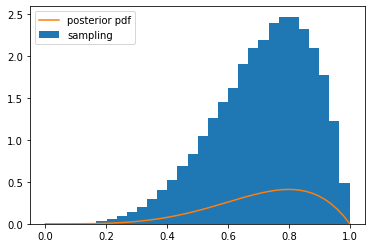

the 25th quantile is 0.6107859464601648
the 50th quantile is 0.7361107414490449
the 75th quantile is 0.8386021544706007


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def P(p):
    return np.where((p>=0) & (p<=1), 6*p*(1-p), 0)

# sample values of p

num = 10**6

p0 = 0.5
sigma_q = 0.5

p_samples = [p0]

for i in range(num-1):
    p_old = p_samples[i]
    p_new = np.random.normal(p_old,sigma_q)
    A = P(p_new)/P(p_old)
    if A > 1:
        p_samples.append(p_new)
    else:
        r = np.random.rand()
        if A > r:
            p_samples.append(p_new)
        else:
            p_samples.append(p_old)


n = 3
r = np.random.rand(num)
p_samples = np.array(p_samples)



landed_on_heads_n_times = np.where(r < p_samples**n, 1, 0)

plt.hist(p_samples,weights=landed_on_heads_n_times,density=True,bins=30,label='sampling')

x = np.linspace(0,1)
y = 5 * x**4 * (1-x)
plt.plot(x,y,label='posterior pdf')
plt.legend()
plt.show()


# get an array with only p_samples that landed on heads 3 times
z = p_samples * landed_on_heads_n_times
landed_on_heads = []
for i in range(len(z)):
    if z[i] != 0:
        landed_on_heads.append(z[i])


# quantiles for p_samples that landed on heads 3 times
print('the 25th quantile is', np.quantile(landed_on_heads,0.25))
print('the 50th quantile is', np.quantile(landed_on_heads,0.50))
print('the 75th quantile is', np.quantile(landed_on_heads,0.75))

## <font color=#46769B>Part (b)</font>

Of course, if you are able to know the posterior PDF ahead to time, it is better just to sample from that!

Write a code to generate $N=10^6$ samples for $p$ from the posterior PDF in Eq. (2) by performing an MCMC simulation using the Metropolis algorithm. (There is no need to "flip" any coins here. You are sampling from the posterior, so all coins have been flipped and landed on heads the required number of times by assumption.)
- Plot a 1D histogram for values of $p$ (no weights are needed here).
- Compute the quartiles for $p$.
- Compare your results to part (a).

the 25th quantile is 0.6100216685165143
the 50th quantile is 0.7350495186944587
the 75th quantile is 0.8388973259221261
the answers from b and a are very similar.


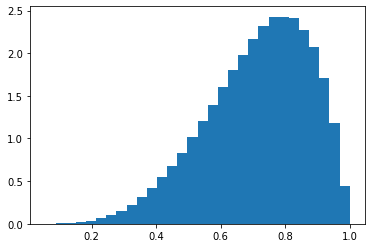

In [2]:
num = 10**6
def P(p):
    return np.where((p >= 0) & (p <= 1), 5*p**4 * (1-p), 0)

p0 = 0.75
sigma_q = 0.5

p_samples = [p0]

for i in range(num-1):
    p_old = p_samples[i]
    p_new = np.random.normal(p_old,sigma_q)
    A = P(p_new)/P(p_old)
    if A > 1:
        p_samples.append(p_new)
    else:
        r = np.random.rand()
        if A > r:
            p_samples.append(p_new)
        else:
            p_samples.append(p_old)

plt.hist(p_samples,density=True,bins=30)

print('the 25th quantile is', np.quantile(p_samples,0.25))
print('the 50th quantile is', np.quantile(p_samples,0.50))
print('the 75th quantile is', np.quantile(p_samples,0.75))

print('the answers from b and a are very similar.')